## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
sns.set(rc={'figure.figsize' : (12,10)})

### Reading the data

In [2]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data cleaning And data Preprocessing

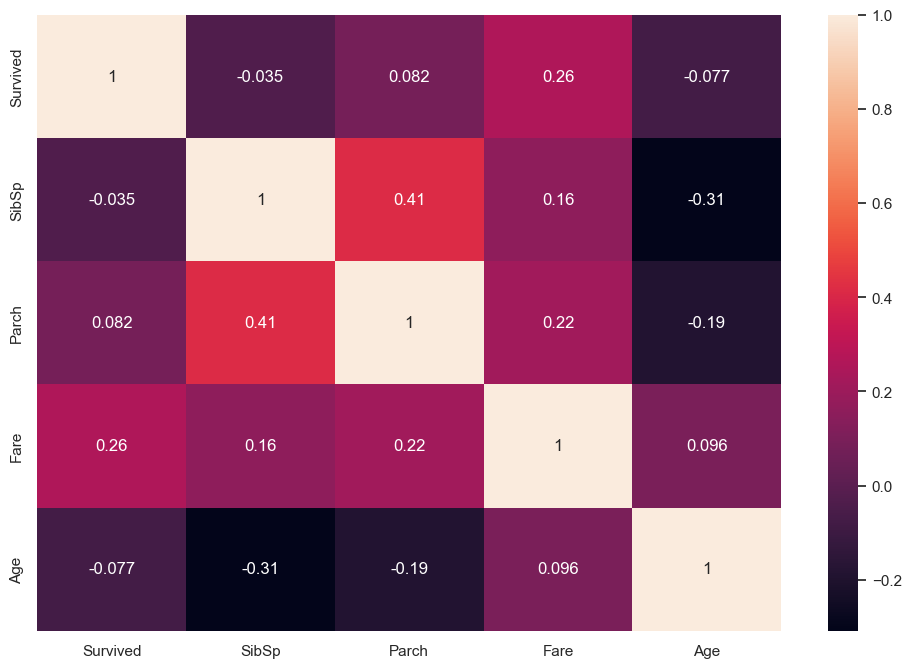

In [5]:
#Analysis Correalation matrix of paraemter with Survived
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(data[['Survived',"SibSp", "Parch",'Fare','Age']].corr() , annot=True)

In [6]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [7]:
data['SibSp'].nunique()

7

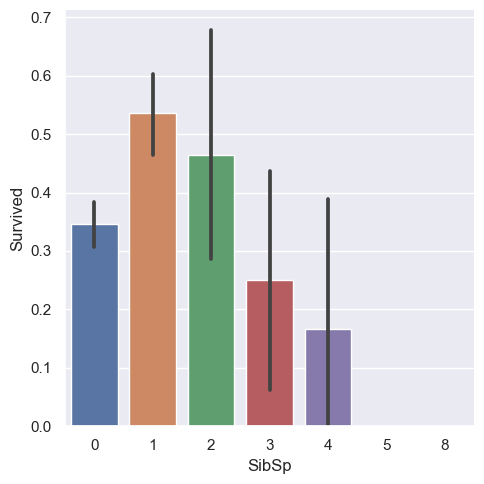

In [8]:
#Checking Sibsp(Siblings) and survival
''''
We can clearly see that people having more Sibsp have less chances of survival as it will be not possible to everyone
to take with them
'''
sns.catplot(x = "SibSp" , y='Survived' , data = data , kind = 'bar')

C:\Users\ARYAN BHATT\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ARYAN BHATT\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


<Figure size 1200x700 with 0 Axes>

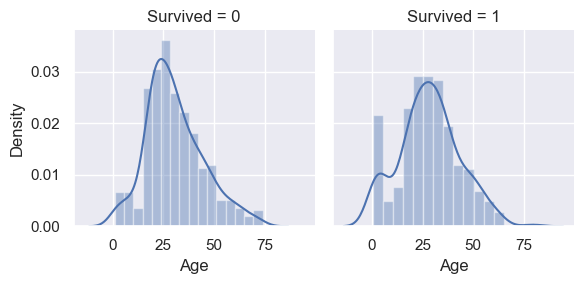

In [9]:
''''
Comparing with age Parameter people of age between nearly 20-35 have high chances of survival 
'''
plt.figure(figsize=(12,7))
age_visual = sns.FacetGrid(data , col = "Survived" )
age_visual = age_visual.map(sns.distplot , "Age")

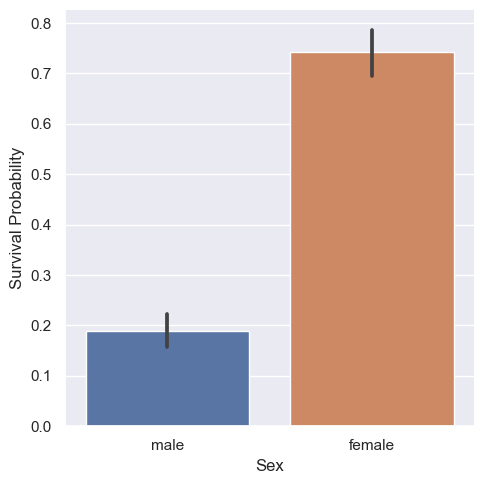

In [10]:
#from the below graph we can say that female have higher chance than males as they are given first chance to 
#rescue
age = sns.catplot(x = "Sex" , y='Survived' , data = data , kind = 'bar').set_ylabels("Survival Probability")

In [11]:
data[['Sex' , 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## <font color  ='green'>Pclass</font>

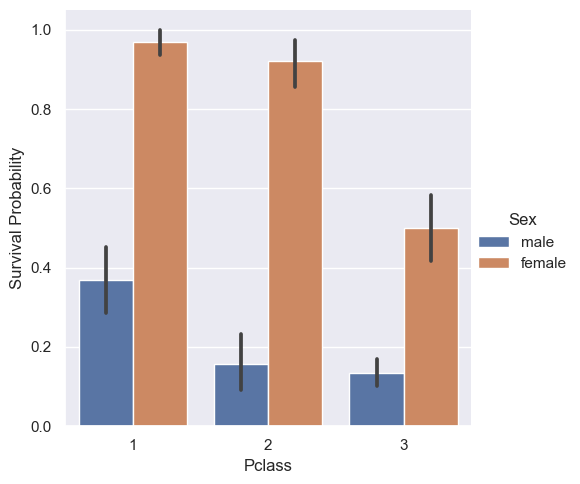

In [12]:
sns.catplot(x = "Pclass" , y='Survived' , data = data , kind = 'bar' , hue='Sex').set_ylabels("Survival Probability")
''''
Female from 1st class and 2nd have slight higher chances of survival as they have paid more money
In comparision to male, they have less chance irrespective of class but 1st males have slighlty higher chances
'''
plt.show()

## <font color  ='green'>Embarked</font>

In [13]:
data['Embarked'].isna().sum()

2

In [14]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
data['Embarked']= data['Embarked'].fillna('S')

In [16]:
data['Embarked'].count()

891

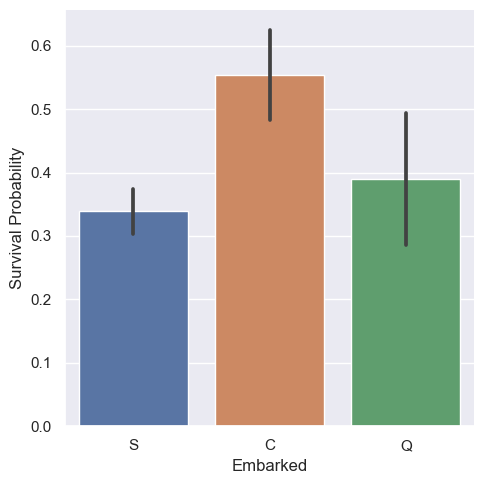

In [17]:
''''
here ,
S = Southampton,C= Cherbourg, and Q = Queenstown
Majorly people have boarded from Southampton thats why they have high survival rate but it does'nt make difference 
from where person is boarded so we will drop Embarked
'''
e = sns.catplot(x = "Embarked" , y='Survived' , data = data , kind = 'bar').set_ylabels("Survival Probability")

<Figure size 1200x700 with 0 Axes>

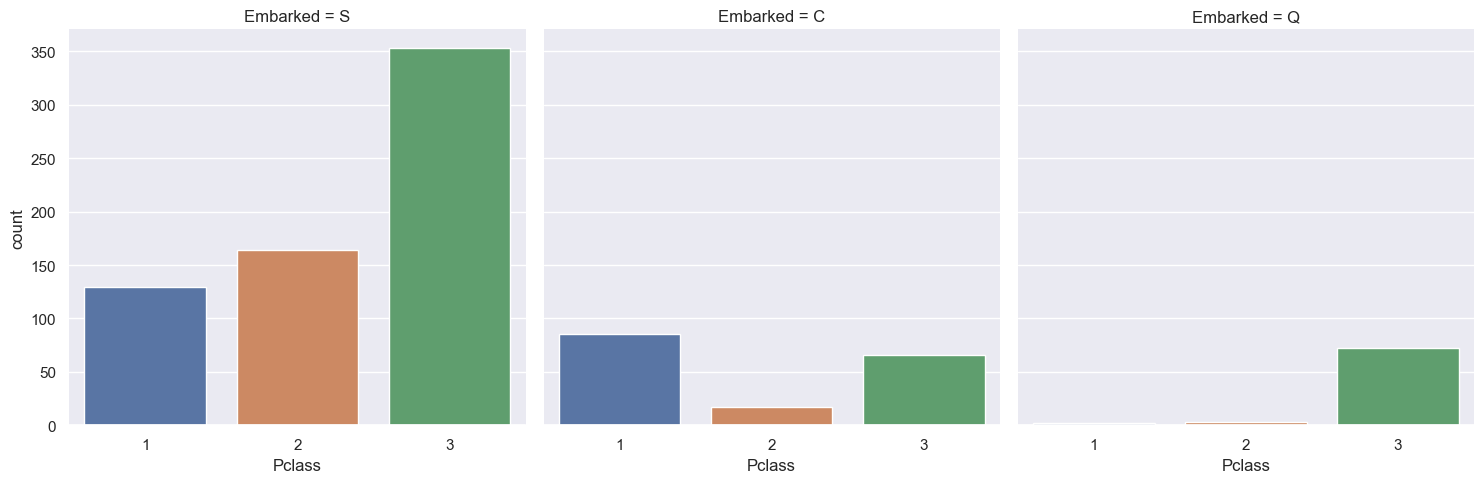

In [18]:
plt.figure(figsize=(12,7))
g = sns.catplot(x="Pclass" ,col='Embarked' , data = data , kind = 'count')
g.despine(left=True)

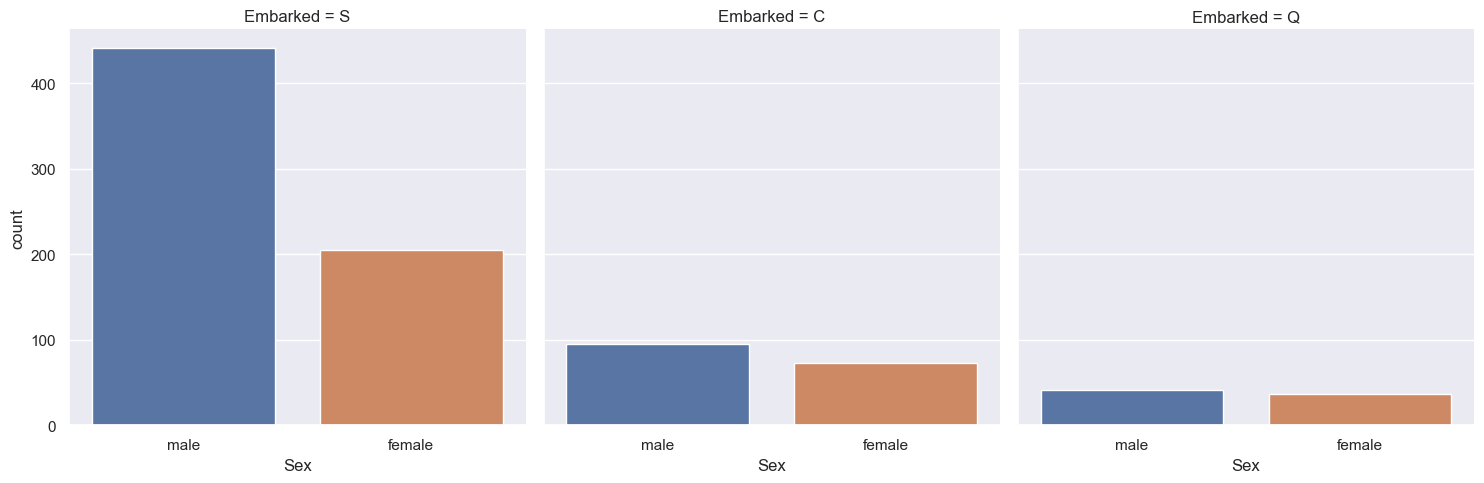

In [19]:
g = sns.catplot(x="Sex" ,col='Embarked' , data = data , kind = 'count')

## <font color  ='green'>Preparing data</font>

In [20]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
''''
Major people who survived are between 20-40 age
so we take mean mean of age and then add and sub standard Deviation so we get center region on graph get values to both 
sides of the peak region
For left side = age - std
For right side = age + std
and after that to fill null values we will randomly select age between this region to make data more unbiased
'''
mean = data['Age'].mean()
std = data['Age'].std()
age_null = data['Age'].isnull().sum()

In [22]:
print(std , mean , age_null)

14.526497332334044 29.69911764705882 177


In [23]:
rand_age = np.random.randint(mean-std , mean+std , size = age_null)
a = data['Age'].copy()
a[np.isnan(a)] = rand_age
data['Age'] = a

In [24]:
data['Embarked']= data['Embarked'].fillna('S')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
col_to_drop=['PassengerId','Name','Ticket','Cabin','Embarked','Parch' ]
data.drop(col_to_drop , axis=1 , inplace = True)

In [27]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [28]:
genders = {'male' : 0 , 'female' : 1}
data['Sex'] =  data['Sex'].map(genders)

In [29]:
# ports = {'S' : 0 , 'C':1 , 'Q' : 2}
# data['Embarked'] = data['Embarked'].map(ports)
# data.head()

In [30]:
# data['Embarked'].unique()

## <font color  ='green'>Spliting data</font>

In [31]:
x = data.drop(['Survived'] , axis = 1)
y = data['Survived']

In [32]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(x_train)
xtest = scaler.transform(x_test)

## Classification

In [47]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_estimators=1000)
knn_classifier = KNeighborsClassifier(6)

In [48]:
logreg.fit(xtrain , y_train)
svc_classifier.fit(xtrain , y_train)
dt_classifier.fit(xtrain , y_train)
rf_classifier.fit(xtrain , y_train)
knn_classifier.fit(xtrain , y_train)

KNeighborsClassifier(n_neighbors=6)

In [49]:
pred_logreg  =logreg.predict(xtest)
pred_svc = svc_classifier.predict(xtest)
pred_dt = dt_classifier.predict(xtest)
pred_rf = rf_classifier.predict(xtest)
pred_knn = knn_classifier.predict(xtest)

In [50]:
from sklearn.metrics import accuracy_score
logred_acc = accuracy_score(y_test , pred_logreg)
svc_acc = accuracy_score(y_test , pred_svc)
dt_acc = accuracy_score(y_test , pred_dt)
rf_acc = accuracy_score(y_test  ,pred_rf)
knn_acc = accuracy_score(y_test , pred_knn)

#### Comparing Which Algorithm gives more Accuracy

In [84]:
print("Logistic Regression :",round(logred_acc*100 , 2))
print("Support Vector      :",round(svc_acc*100 , 2))
print("Decision Tree       :",round(dt_acc*100 , 2))
print("Random Forest       :",round(rf_acc*100 , 2))
print("K-NN Classifier     :",round(knn_acc*100 , 2))

Logistic Regression : 79.1
Support Vector      : 79.48
Decision Tree       : 74.63
Random Forest       : 82.09
K-NN Classifier     : 79.85


Checking Predcition with input

In [96]:
# pred= rf_classifier.predict([])
test = np.array([0,1,55,0,75000])
x_test.shape
test = test.reshape(1,5)
test.shape

(1, 5)

In [97]:
pred = rf_classifier.predict(test)

In [98]:
pred

array([1], dtype=int64)

In [99]:
print("Person from 1st class who is Male of age 27 will chances of survival",pred[0])

Person from 1st class who is Male of age 27 will chances of survival 1


In [62]:
#OLS method is not as powerful for classifier as it is for any linear model as such  any regression Model
import statsmodels.api as sm
x_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_const)
result = model.fit()

In [56]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     77.71
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           3.63e-63
Time:                        18:58:25   Log-Likelihood:                -284.12
No. Observations:                 623   AIC:                             580.2
Df Residuals:                     617   BIC:                             606.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7267      0.083      8.753      0.0

## Conclusion

At First will compare and analyse which feature affects the most in survival of passengers and after that selecting those and preparing our ML model. Using different algorithm to check which algo fits the best model

In our case RandomForest Algorithm predicts the highest accuracy of the survival passengers.